# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [67]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [60]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [61]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


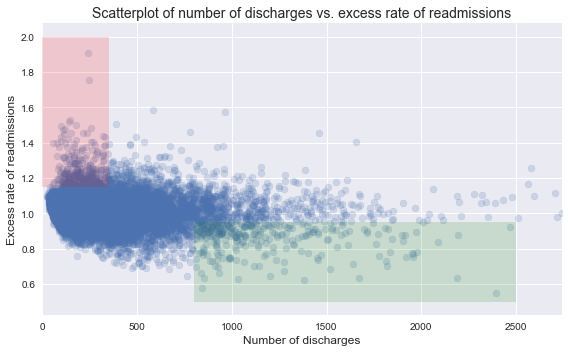

In [133]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

# Scatterplot: # Discharges vs Excess Readmission Ratio
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# POINTOUT areas
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

# MINOR labels
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

# MINOR extras
ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges (*hard to say, need to look into this and move forward with this issue.  It is remaining constant.*)
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red) - small
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) - small 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

****
<div class="span5 alert alert-info">
### Thoughts and Reflections

Overall, the preliminary analysis looks weak.

1. Vague about downward trend.  
2. Visualization problems are frustrating (they don't communicate the trends).
3. More statistics would be needed including correlations coefficient and linear regression!
4. No significant correlation highlighted in the graph!  
5. All the following stats don't support the following conclusions and recommendations.  It is a red flag!
6. No indication between small and large hospitals.
7. No consistency in terminology (i.e. hospital capacity = \# discharges)

In short, this was a 'BS' graph, designed to fit the person's recommendations (common).  With **11,578** observations, a bulk lies around an excess readmissions rate of **0.75 - 1.35** within 1,250 discharges.  It is worth exploring this.  And notice that the graph does have a couple of outliers.  

So, this exercise has our work cut off for us.  

### Strategy

This will focus on creating a hypothesis test for (a) linear regression and (b) correlation.  

* $H_0$: Significant correlation between \# discharges and excess re-admission rate.

* $H_a$: No significant correlation between \# discharges and excess re-admission rate.

To do this, let's clean the data removing any null readmission rates.  Afterwards, let's modify the graph to show its better significance followed by a story of what occurred and whether this recommendation is acceptable.  
</div>
****

### Setup

In [134]:
# set a new data frame that has # readmissions as a value
clean_hos_df=clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
clean_hos_df_low = clean_hos_df[clean_hos_df['Number of Discharges'] <= 100]
clean_hos_df_high = clean_hos_df[clean_hos_df['Number of Discharges'] >= 1000]
clean_hos_df.shape

(11497, 12)

In [135]:
clean_hos_df_mid = clean_hos_df[(clean_hos_df['Number of Discharges'] > 100) & (clean_hos_df['Number of Discharges'] < 1000)]
clean_hos_df_mid

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
5092,ENNIS REGIONAL MEDICAL CENTER,450833,TX,READM-30-COPD-HRRP,101,NaN,1.0232,22.0,21.5,24.0,07/01/2010,06/30/2013
6788,SCOTTSDALE HEALTHCARE-THOMPSON PEAK HOSPITAL,30123,AZ,READM-30-COPD-HRRP,101,NaN,0.9982,19.9,20.0,20.0,07/01/2010,06/30/2013
4351,BROOKDALE HOSPITAL MEDICAL CENTER,330233,NY,READM-30-PN-HRRP,101,NaN,1.0354,20.6,19.9,23.0,07/01/2010,06/30/2013
2837,BROOKS MEMORIAL HOSPITAL,330229,NY,READM-30-HF-HRRP,101,NaN,1.0649,24.0,22.6,28.0,07/01/2010,06/30/2013
5417,CUMBERLAND RIVER HOSPITAL,440141,TN,READM-30-COPD-HRRP,101,NaN,1.0186,19.5,19.1,21.0,07/01/2010,06/30/2013
4394,SAN FRANCISCO GENERAL HOSPITAL,50228,CA,READM-30-COPD-HRRP,101,NaN,1.0347,19.3,18.7,22.0,07/01/2010,06/30/2013
10471,SOMERSET HOSPITAL,390039,PA,READM-30-PN-HRRP,101,NaN,0.9467,16.1,17.0,13.0,07/01/2010,06/30/2013
10343,MERCY GILBERT MEDICAL CENTER,30119,AZ,READM-30-AMI-HRRP,101,NaN,0.9489,16.6,17.5,14.0,07/01/2010,06/30/2013
5371,MCKENZIE-WILLAMETTE MEDICAL CENTER,380020,OR,READM-30-AMI-HRRP,101,NaN,1.0193,15.8,15.5,17.0,07/01/2010,06/30/2013
6443,EAST TEXAS MEDICAL CENTER MOUNT VERNON,450373,TX,READM-30-PN-HRRP,101,NaN,1.0034,17.6,17.6,18.0,07/01/2010,06/30/2013


### Simple Data Analysis

In [136]:
clean_hos_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11497.000000,11497.000000,0.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257571.540141,365.466209,NaN,1.007504,17.984292,17.865695,63.633731
std,154274.374018,308.754590,NaN,0.091964,5.487651,5.240749,59.540296
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,160.000000,NaN,0.952600,16.300000,16.600000,24.000000
50%,250042.000000,282.000000,NaN,1.003500,19.000000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [137]:
clean_hos_df[clean_hos_df['Excess Readmission Ratio'] >= 1.0].describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5950.000000,5950.000000,0.0,5950.000000,5950.000000,5950.000000,5950.000000
mean,254612.042689,350.481681,NaN,1.072958,19.134437,17.954017,70.509916
std,149330.070483,294.146368,NaN,0.068870,5.684807,5.377508,65.334500
min,10001.000000,25.000000,NaN,1.000000,4.400000,4.000000,11.000000
25%,110186.000000,151.000000,NaN,1.025600,17.600000,16.800000,27.000000
50%,250034.000000,269.000000,NaN,1.056000,20.300000,19.100000,51.000000
75%,370056.750000,460.000000,NaN,1.097700,22.800000,21.500000,92.000000
max,670082.000000,3570.000000,NaN,1.909500,32.800000,28.000000,879.000000


In [154]:
clean_hos_df_mid['Excess Readmission Ratio'].describe()

count    9810.000000
mean        1.007065
std         0.093517
min         0.574800
25%         0.948900
50%         1.001400
75%         1.059675
max         1.909500
Name: Excess Readmission Ratio, dtype: float64

In [139]:
len(clean_hos_df_mid[clean_hos_df_mid['Excess Readmission Ratio'] >= 1.0])/clean_hos_df_mid['Excess Readmission Ratio'].count()

0.50723751274209994

In [140]:
clean_hos_df_low['Excess Readmission Ratio'].describe()

count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

In [141]:
len(clean_hos_df_low[clean_hos_df_low['Excess Readmission Ratio'] >= 1.0])/clean_hos_df_low['Excess Readmission Ratio'].count()

0.62796402289452169

In [142]:
clean_hos_df_low['Excess Readmission Ratio'].count()/clean_hos_df['Excess Readmission Ratio'].count()

0.10637557623727929

In [143]:
clean_hos_df_high['Excess Readmission Ratio'].describe()

count    464.000000
mean       0.978334
std        0.119878
min        0.549500
25%        0.908050
50%        0.986000
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64

In [144]:
len(clean_hos_df_high[clean_hos_df_high['Excess Readmission Ratio'] >= 1.0])/clean_hos_df_high['Excess Readmission Ratio'].count()

0.44396551724137934

In [145]:
clean_hos_df_high['Excess Readmission Ratio'].count()/clean_hos_df['Excess Readmission Ratio'].count()

0.040358354353309561

The statistics reported are right.  However, the size is what's important too!  

** Discharges ** | **n** | **mean** | **ERAR > 1.0**
--- | --- | --- | ---
All | 11,497 | 1.056 | 52%
100 and few| 1,223 | 1.023 | 63%
100 - 1000 | 9,810 | 1.007 | 51%
1000 and more | 464 | 0.978 | 44%

The numbers do make a projection validating the case.  When looking at 100 and fewer discharges, the excess re-admission is high but not by a lot.  But we need to look further.

### Hypothesis Test & Statistical Significance ($\alpha$ = 0.05)

In [146]:
# correlation coefficient
from scipy.stats.stats import pearsonr   
pearsonr(x,y)

(-0.093095542875904408, 1.5022756426464526e-23)

It is showing a downward trend; however, it is a very weak.  The correlation between the \# discharges and the excess re-admission ratio is -0.093, with a p-value of 1.502e-23.  This is very small, especially for a statistical significance of 0.05.  Therefore, just from this alone, we may **reject the null hypothesis**. There is no significant correlation between the excess re-admission rate and the number of discharges.  As a back-up, let's do a linear regression to see if it qualifies with a statistical significance of $\alpha = 0.01$.

### Report Statistical Significance ($\alpha$ = 0.01)

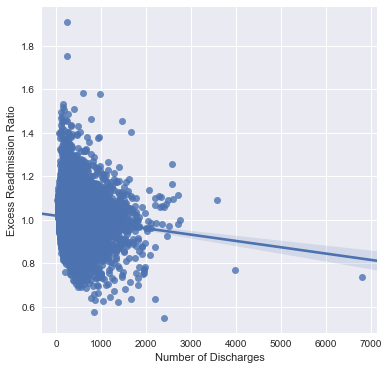

In [147]:
f, ax = plt.subplots(figsize=(6, 6))
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hos_df);

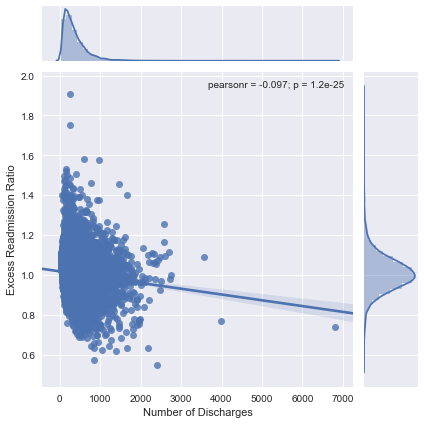

In [148]:
sns.jointplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hos_df, kind="reg");

In [175]:
def simple_linear_regression(X, y): #ack http://charlesfranzen.com/posts/simple-linear-regression-in-python/
    '''
    Returns slope and intercept for a simple regression line
    
    inputs- Works best with numpy arrays, though other similar data structures will work fine.
        X - input data
        y - output data
        
    outputs - floats
    '''
    # initial sums
    n = float(len(X))
    sum_x = X.sum()
    sum_y = y.sum()
    sum_xy = (X*y).sum()
    sum_xx = (X**2).sum()
    
    # formula for w0
    slope = (sum_xy - (sum_x*sum_y)/n)/(sum_xx - (sum_x*sum_x)/n)
    
    # formula for w1
    intercept = sum_y/n - slope*(sum_x/n)
    
    return (slope, intercept)

In [176]:
a, b = simple_linear_regression(clean_hos_df["Number of Discharges"], clean_hos_df["Excess Readmission Ratio"])
print("[ERAR] = %.5f * [# discharges] + %.5f" % (a, b))

[ERAR] = -0.00003 * [# discharges] + 1.01811


Even with a statistical significance of $\alpha$ = 0.01, the p-value remains unchanged.  So the null hypothesis is rejected until $\alpha$ has a tiny significance.  A significance of zero is not ideal; this would imply complete acceptance regardless of the test.  Therefore, there is no significant correlation between the two variables.

### Discuss statistical significance & practical significance

### Scatterplot